In [1]:
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.io import ascii
from astroquery.gaia import Gaia
import matplotlib.pyplot as plt
import numpy as np
Gaia.ROW_LIMIT = -1

In [80]:
from matplotlib import rcParams
rcParams['font.family'] = 'CMU Serif'
rcParams['mathtext.fontset'] = 'cm'
plt.rc('axes', unicode_minus=False)

In [2]:
coord = SkyCoord("01h33m50.8965749232s +30d39m36.630403128s", frame='icrs')
width = u.Quantity(3, u.arcmin)
height = u.Quantity(3, u.arcmin)
r = Gaia.query_object_async(coordinate=coord, width=width, height=height)

INFO: Query finished. [astroquery.utils.tap.core]


In [6]:
g_max = np.max(r['phot_g_mean_mag'])
g_min = np.min(r['phot_g_mean_mag'])

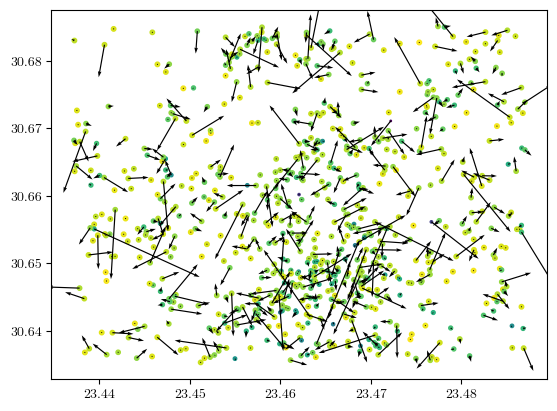

In [81]:
fig, ax = plt.subplots(1, 1)
ax.scatter(r['ra'], r['dec'], s=1+10*(r['phot_g_mean_mag'] - g_min)/(g_max - g_min), c=(r['phot_g_mean_mag'] - g_min)/(g_max - g_min))
#plt.quiver(np.array(r['ra'][mask]), np.array(r['dec'][mask]), np.array(r['pmra'][mask]), np.array(r['pmdec'][mask]))
ax.quiver(r['ra'].filled(0), r['dec'].filled(0), r['pmra'].filled(0), r['pmdec'].filled(0))
fig.savefig("quiver.png", dpi=300)
plt.show()